# Index   

0. [Importing libraries](##Importing-libraries) 


1. [Exploratory Data Analysis](#Exploratory-Data-Analysis)

 [Reading the data set](###Reading-the-data-set)

2. [Data Enginnering](#Dara-Engineering)
 
3. [Model Screening with Pycaret](#Model-screening-with-PycaretModel-Screening)

4. [Tunning Random Forest Hyperparameters with Optuna](##Random-Forest-Hyperparameters-tunning-with-Optuna)

5. [Prediction of test_X](##test_X-prediction)



### Importing libraries

In [6]:
#Data exploration & manipulation
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from collections import Counter
import seaborn as sns
import matplotlib.style as style 
import datetime as dt
import os
import matplotlib.pyplot as plt

#ML Models search and optimisation
from pycaret.classification import * 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
import optuna
from sklearn.model_selection import cross_val_score



# Exploratory Data Analysis


In [22]:
# Import train.csv
train_diag_Cancer_df = pd.read_csv(r'C:\Users\march\000 Treball Ju`yter 000\Hackathons\Access_Project_Hackathon_IT_Decathlon\initial docs\train.csv', index_col=None)

In [23]:
train_diag_Cancer_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,10.71,20.39,69.50,344.9,0.10820,0.12890,0.08448,0.02867,0.1668,0.06862,0.3198,1.4890,2.230,20.74,0.008902,0.047850,0.07339,0.017450,0.02728,0.007610,11.69,25.21,76.51,410.4,0.1335,0.2550,0.2534,0.08600,0.2605,0.08701
1,0,13.64,16.34,87.21,571.8,0.07685,0.06059,0.01857,0.01723,0.1353,0.05953,0.1872,0.9234,1.449,14.55,0.004477,0.011770,0.01079,0.007956,0.01325,0.002551,14.67,23.19,96.08,656.7,0.1089,0.1582,0.1050,0.08586,0.2346,0.08025
2,0,11.71,17.19,74.68,420.3,0.09774,0.06141,0.03809,0.03239,0.1516,0.06095,0.2451,0.7655,1.742,17.86,0.006905,0.008704,0.01978,0.011850,0.01897,0.001671,13.01,21.39,84.42,521.5,0.1323,0.1040,0.1521,0.10990,0.2572,0.07097
3,1,15.30,25.27,102.40,732.4,0.10820,0.16970,0.16830,0.08751,0.1926,0.06540,0.4390,1.0120,3.498,43.50,0.005233,0.030570,0.03576,0.010830,0.01768,0.002967,20.27,36.71,149.30,1269.0,0.1641,0.6110,0.6335,0.20240,0.4027,0.09876
4,1,14.45,20.22,94.49,642.7,0.09872,0.12060,0.11800,0.05980,0.1950,0.06466,0.2092,0.6509,1.446,19.42,0.004044,0.015970,0.02000,0.007303,0.01522,0.001976,18.33,30.12,117.90,1044.0,0.1552,0.4056,0.4967,0.18380,0.4753,0.10130


In [25]:
train_diag_Cancer_df.shape

(455, 31)

Initial data frame is made of 30 columns, including the target column as 'diagnosis' and other 29 that looks like data extracted from a mammogram, and 455 lines/registers that correspond to different mamogramms/medical test of patients. Let's explore them:

In [26]:
train_diag_Cancer_df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

No null values were detected.

In [27]:
train_diag_Cancer_df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,0.373626,14.139000,19.306286,92.086044,657.829890,0.096849,0.105557,0.090775,0.049585,0.181319,0.062925,0.403945,1.213024,2.846826,40.398501,0.007067,0.025605,0.032376,0.011779,0.020244,0.003814,16.276679,25.823099,107.319516,882.553187,0.133482,0.256997,0.278242,0.115695,0.290325,0.084309
std,0.484299,3.625935,4.267421,24.998077,363.536865,0.013981,0.052932,0.080993,0.039159,0.027140,0.007045,0.286415,0.519653,2.091831,47.691358,0.003095,0.018202,0.031443,0.006082,0.008006,0.002770,4.897917,6.123728,34.025815,574.721873,0.022902,0.157587,0.211802,0.065949,0.059696,0.018168
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.116700,0.049960,0.114400,0.362100,0.757000,6.802000,0.002667,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.081250,0.034320,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.705000,16.210000,75.015000,419.250000,0.086740,0.066735,0.030180,0.020720,0.162050,0.057885,0.232350,0.841800,1.596500,17.695000,0.005146,0.013635,0.015220,0.007766,0.014985,0.002228,12.980000,21.350000,84.290000,513.950000,0.118350,0.151650,0.119350,0.065080,0.251550,0.071835
50%,0.000000,13.300000,18.890000,85.980000,546.400000,0.096860,0.094860,0.063870,0.033840,0.179700,0.061550,0.318600,1.108000,2.244000,24.280000,0.006261,0.020450,0.026110,0.010900,0.018530,0.003211,14.990000,25.440000,97.660000,688.600000,0.132600,0.215600,0.229900,0.099930,0.283300,0.080190
75%,1.000000,15.740000,21.795000,103.650000,777.250000,0.106050,0.130450,0.132200,0.074490,0.195800,0.066375,0.475950,1.474500,3.281500,45.295000,0.008182,0.032045,0.040775,0.014600,0.023085,0.004537,18.550000,29.990000,124.950000,1047.000000,0.147950,0.333800,0.387200,0.161950,0.317500,0.092070
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.095750,2.873000,3.647000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.577400,0.207500


Values of the differents parameters differ on range and average.  are very similar (range from -0.433 to 6.700). There is no null values to be cleaned.

In [28]:
y = train_diag_Cancer_df.diagnosis

Text(0, 0.5, '# of instances')

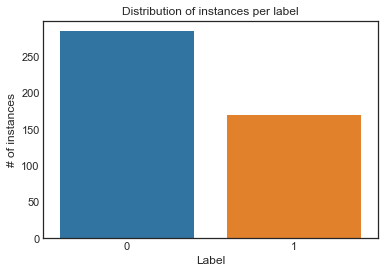

In [29]:

#Label distribution checking
sns.set_context("notebook")
style.use('seaborn-white')    
counter = Counter(y)
dist_plot=sns.barplot(x=list(counter.keys()), y=list(counter.values()))
dist_plot.set_title('Distribution of instances per label')
dist_plot.set_xlabel('Label')
dist_plot.set_ylabel('# of instances')

In [30]:
ratio_labels= [x/len(y) for x in list(counter.values())]
ratio_labels

[0.6263736263736264, 0.37362637362637363]

Although the distribution of samples is nearly 1 to 2 (0 vs 1 or benign vs mailgn), it can not be considered a very unballanced population. the difference of ditribution of samples should work fine for classification algorithm but it can be considered to perform some slight oversampling of registers with label 1. 

Let's have a look on the data:

In [31]:
pairplot_diagnosis_data = sns.pairplot(train_diag_Cancer_df, corner=True,hue='diagnosis')
pairplot_diagnosis_data.fig.suptitle('Pair plot of sensors with status label differentiation')

From the previous graph it can be concluded that:
* Each class has a gaussian type distribution.
* The different labels form clusters for certain sensors, such differences are the ground of predictions.

Text(0.5, 1.0, 'Correlation of values of different sensors')

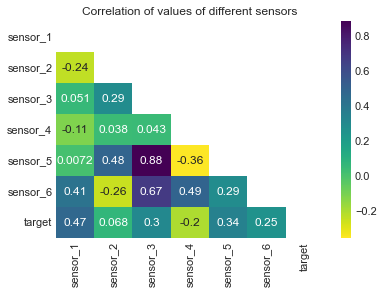

In [11]:
# Getting the Lower Triangle of the co-relation matrix
matrix = np.triu(space_X_train.corr())
heatmap_correlations_diag_data = sns.heatmap(space_X_train.corr(), annot=True, cmap='viridis_r', mask=matrix)
heatmap_correlations_diag_data.set_title('Correlation of values of diagnostic test data')

Sensors 3 and 5 are highly correlated but it does not involve a correlation with the differents labels/status.

# Dara Engineering

There is no need to clean, and it may be tried some data engineering of the Data set. Let's consider to check normalization, standarization and treating outliers with robustscaler:

In [12]:
space_X_train.columns

Index(['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6',
       'target'],
      dtype='object')

In [13]:
x = space_X_train.drop('target',axis=1).values #returns a numpy array
numerical_cols=['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6']


In [14]:

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
space_X_train_min_max_scaled = pd.DataFrame(x_scaled)


In [16]:

scaler = preprocessing.RobustScaler()
space_X_train_robust = scaler.fit_transform(x)
space_X_train_robust = pd.DataFrame(space_X_train_robust, columns =numerical_cols)


In [17]:

scaler = preprocessing.StandardScaler()
space_X_train_standard = scaler.fit_transform(x)
space_X_train_standard = pd.DataFrame(space_X_train_standard, columns =numerical_cols)


In [18]:
space_X_train_min_max_scaled ['target'] = space_X_train['target']
space_X_train_robust ['target'] = space_X_train['target']
space_X_train_standard ['target'] = space_X_train['target']


# Model screening with Pycaret

With Pycaret we test the dataframe with several models to check its performance with :

In [29]:
setup(space_X_train,
          target='target',
    )
best_model_rfc=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7720,0.9442,0.7731,0.7782,0.7713,0.7149,0.7165,0.6110
et,Extra Trees Classifier,0.7638,0.9441,0.7642,0.7689,0.7633,0.7047,0.7060,0.4480
lightgbm,Light Gradient Boosting Machine,0.7576,0.9421,0.7583,0.7643,0.7563,0.6970,0.6990,0.4440
gbc,Gradient Boosting Classifier,0.7393,0.9355,0.7402,0.7442,0.7375,0.6740,0.6760,1.2480
knn,K Neighbors Classifier,0.7365,0.9226,0.7367,0.7435,0.7355,0.6705,0.6726,0.1100
dt,Decision Tree Classifier,0.6753,0.7969,0.6750,0.6792,0.6738,0.5939,0.5954,0.0330
ada,Ada Boost Classifier,0.5834,0.8237,0.5858,0.5857,0.5669,0.4794,0.4853,0.2110
nb,Naive Bayes,0.5698,0.8373,0.5710,0.5670,0.5558,0.4621,0.4674,0.0270
qda,Quadratic Discriminant Analysis,0.5398,0.8382,0.5381,0.5779,0.5371,0.4243,0.4326,0.0280
lr,Logistic Regression,0.5160,0.7913,0.5171,0.4877,0.4886,0.3949,0.4010,0.0520


In [32]:
print(best_model_rfc)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=6041, verbose=0,
                       warm_start=False)


Let's try with the data modified with data engineering: MinMaxScaler, Standarization and RobustScaler. 

In [33]:
setup(space_X_train_min_max_scaled,
          target='target', 
    )
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7550,0.9404,0.7544,0.7584,0.7544,0.6935,0.6945,0.5400
et,Extra Trees Classifier,0.7522,0.9381,0.7522,0.7544,0.7510,0.6901,0.6911,0.4690
rf,Random Forest Classifier,0.7440,0.9394,0.7441,0.7463,0.7428,0.6799,0.6810,0.6030
gbc,Gradient Boosting Classifier,0.7393,0.9360,0.7391,0.7423,0.7382,0.6739,0.6751,1.3990
knn,K Neighbors Classifier,0.7236,0.9184,0.7224,0.7267,0.7216,0.6541,0.6556,0.1150
dt,Decision Tree Classifier,0.6535,0.7833,0.6532,0.6537,0.6513,0.5666,0.5675,0.0280
qda,Quadratic Discriminant Analysis,0.6318,0.8985,0.6326,0.6702,0.6080,0.5396,0.5541,0.0270
nb,Naive Bayes,0.5643,0.8351,0.5631,0.5665,0.5462,0.4544,0.4616,0.0290
ada,Ada Boost Classifier,0.5596,0.8026,0.5603,0.5542,0.5458,0.4491,0.4536,0.2230
lda,Linear Discriminant Analysis,0.5058,0.7856,0.5071,0.4823,0.4770,0.3820,0.3891,0.0280


In [34]:
print(best_model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=4396, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [35]:
setup(space_X_train_standard,
          target='target'
    )
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7550,0.9407,0.7549,0.7573,0.7539,0.6936,0.6946,0.5200
rf,Random Forest Classifier,0.7502,0.9420,0.7501,0.7520,0.7488,0.6876,0.6886,0.5910
lightgbm,Light Gradient Boosting Machine,0.7474,0.9350,0.7472,0.7493,0.7462,0.6842,0.6852,0.4850
knn,K Neighbors Classifier,0.7325,0.9219,0.7318,0.7380,0.7303,0.6654,0.6674,0.1360
gbc,Gradient Boosting Classifier,0.7223,0.9306,0.7227,0.7225,0.7193,0.6528,0.6542,1.4000
dt,Decision Tree Classifier,0.6616,0.7884,0.6618,0.6635,0.6599,0.5769,0.5781,0.0270
ada,Ada Boost Classifier,0.5630,0.8151,0.5657,0.5541,0.5473,0.4540,0.4587,0.2050
qda,Quadratic Discriminant Analysis,0.5534,0.8527,0.5513,0.5719,0.5395,0.4411,0.4505,0.0240
nb,Naive Bayes,0.5507,0.8348,0.5502,0.5524,0.5362,0.4378,0.4434,0.0240
lr,Logistic Regression,0.5221,0.7870,0.5231,0.4918,0.4884,0.4024,0.4099,0.0510


In [36]:
print(best_model)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=1623, verbose=0,
                     warm_start=False)


In [37]:
setup(space_X_train_robust,
          target='target'
    )
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7611,0.9482,0.7601,0.7661,0.7607,0.7012,0.7024,0.6610
et,Extra Trees Classifier,0.7583,0.9467,0.7578,0.7654,0.7584,0.6979,0.6994,0.4980
lightgbm,Light Gradient Boosting Machine,0.7522,0.9412,0.7519,0.7588,0.7524,0.6903,0.6916,0.5350
knn,K Neighbors Classifier,0.7372,0.9238,0.7362,0.7438,0.7360,0.6714,0.6732,0.1150
gbc,Gradient Boosting Classifier,0.7277,0.9385,0.7265,0.7327,0.7268,0.6596,0.6610,1.3300
dt,Decision Tree Classifier,0.6616,0.7886,0.6601,0.6675,0.6600,0.5769,0.5788,0.0310
qda,Quadratic Discriminant Analysis,0.5854,0.8656,0.5859,0.6242,0.5774,0.4819,0.4932,0.0280
ada,Ada Boost Classifier,0.5705,0.8170,0.5684,0.5589,0.5535,0.4624,0.4672,0.2460
nb,Naive Bayes,0.5528,0.8406,0.5506,0.5506,0.5393,0.4405,0.4453,0.0250
lr,Logistic Regression,0.5003,0.7957,0.4989,0.4806,0.4690,0.3748,0.3811,0.0480


In [39]:
print(best_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=8858, verbose=0,
                       warm_start=False)


## Random Forest Hyperparameters tunning with Pycaret

In [40]:
def scoring_f1(y_test,X_test,method): #generation of f1 macro
    '''
    Funtion to get the f1_macro metric 
    Input: 
        y_test = real target label of the data set used
        X_test = features used to determine the label target
        method = model evaluated which will predict the target labels
    Output:
        Float number corresponding to the F1_macro.'''

    f1score=f1_score(y_test,
                     method.predict(X_test),
                     average= 'macro'
)        
    return f1score  

To avoid data leakage in Pycaret, the model to be tuned will be created with the train set:

In [42]:
X=space_X_train.copy()
y=X.target


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,stratify=y)
X_train.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,target
19,-1.153663,-0.490551,-1.221787,1.198523,-1.645471,-0.397307,1
807,0.051587,-2.850896,-1.648007,1.069979,-2.540411,0.311744,2
974,-1.615734,-0.396239,-0.605161,0.191728,-0.660267,-0.590922,1
1746,1.700228,0.049878,-0.189630,-1.797814,0.570287,-0.449787,4
905,-1.906572,-0.770195,-2.545250,0.390334,-2.492019,-1.664043,1


In [44]:
setup(X_train,
          target='target'
    )
    
best_model2=compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7468,0.9405,0.7461,0.7513,0.7452,0.6834,0.6852,0.5810
et,Extra Trees Classifier,0.7449,0.9407,0.7439,0.7488,0.7435,0.6810,0.6825,0.4670
lightgbm,Light Gradient Boosting Machine,0.7296,0.9321,0.7289,0.7352,0.7278,0.6619,0.6641,0.5040
gbc,Gradient Boosting Classifier,0.7160,0.9287,0.7153,0.7190,0.7133,0.6449,0.6467,1.0880
knn,K Neighbors Classifier,0.7087,0.9179,0.7070,0.7128,0.7060,0.6355,0.6376,0.1390
dt,Decision Tree Classifier,0.6589,0.7869,0.6569,0.6643,0.6573,0.5733,0.5752,0.0350
nb,Naive Bayes,0.5644,0.8299,0.5609,0.5611,0.5481,0.4544,0.4602,0.0260
qda,Quadratic Discriminant Analysis,0.5589,0.8443,0.5566,0.5845,0.5561,0.4480,0.4541,0.0300
ada,Ada Boost Classifier,0.5490,0.8032,0.5473,0.5488,0.5373,0.4354,0.4398,0.2000
lr,Logistic Regression,0.5390,0.7878,0.5397,0.5173,0.5118,0.4234,0.4301,1.7080


In [45]:
model_rf_pycaret = best_model2
X_test.drop('target', axis=1, inplace=True) #target column should be removed
print (f' score f1-macro of Random Forest Classifier with Pycaret = {scoring_f1(y_test,X_test,model_rf_pycaret)}')

 score f1-macro of Random Forest Classifier with Pycaret = 0.7704753873647545


In [46]:
# train model
rf_model = create_model('rf')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7477,0.9277,0.7475,0.7507,0.7459,0.6848,0.6864
1,0.7658,0.9560,0.7655,0.7680,0.7642,0.7072,0.7086
2,0.7545,0.9290,0.7525,0.7594,0.7549,0.6932,0.6941
3,0.8091,0.9541,0.8092,0.8100,0.8079,0.7612,0.7619
4,0.7273,0.9365,0.7293,0.7470,0.7293,0.6593,0.6635
5,0.8000,0.9621,0.7976,0.8020,0.7981,0.7498,0.7511
6,0.7636,0.9408,0.7613,0.7655,0.7615,0.7041,0.7055
7,0.7000,0.9279,0.7006,0.7099,0.6968,0.6253,0.6287
8,0.7000,0.9445,0.6977,0.7010,0.6954,0.6246,0.6270
9,0.7000,0.9269,0.6994,0.6992,0.6977,0.6247,0.6255


In [47]:
print (f' score f1 of rf created by Pycaret not tunned = {scoring_f1(y_test,X_test,rf_model)}') 

 score f1 of rf created by Pycaret not tunned = 0.7704753873647545


In [48]:
# tune model
tuned_rf_model = tune_model(rf_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6937,0.9166,0.6930,0.6951,0.6864,0.6172,0.6207
1,0.7297,0.9477,0.7292,0.7328,0.7192,0.6619,0.6671
2,0.7182,0.9307,0.7165,0.7189,0.7140,0.6477,0.6495
3,0.7818,0.9535,0.7819,0.7873,0.7804,0.7270,0.7291
4,0.7000,0.9258,0.7025,0.7053,0.6993,0.6253,0.6269
5,0.7727,0.9591,0.7686,0.7788,0.7688,0.7154,0.7187
6,0.7000,0.9310,0.6991,0.7021,0.6940,0.6249,0.6279
7,0.6364,0.9091,0.6364,0.6382,0.6321,0.5454,0.5477
8,0.7364,0.9458,0.7341,0.7421,0.7271,0.6699,0.6747
9,0.6364,0.9165,0.6347,0.6375,0.6313,0.5451,0.5477


In [49]:
print (f' Score f1 of Random Forest by Pycaret and Tuned = {scoring_f1(y_test,X_test,tuned_rf_model)}') 

 Score f1 of Random Forest by Pycaret and Tuned = 0.7581663867854406


The initial model worked better than the tunned one regarding the f1_macro metric. 

## Random Forest Hyperparameters tunning with Optuna

In [50]:
import optuna

In [51]:
X=space_X_train.copy()
y=X.target
X.drop('target',axis=1, inplace=True)

In [53]:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=853, verbose=0,
                       warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=853, verbose=0,
                       warm_start=False)

In [54]:
def objective(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,stratify=y)
    
    bootstrap = trial.suggest_categorical('bootstrap',['True','False'])
    max_depth = trial.suggest_int('max_depth', 1, 100000)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt','log2'])
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 1, 100000)
    n_estimators =  trial.suggest_int('n_estimators', 30, 1000)
    n_jobs =  trial.suggest_int('n_jobs', 2, 20)
    
    rf_cl = RandomForestClassifier(bootstrap = bootstrap, 
                                   max_depth = max_depth, 
                                   max_features = max_features,
                                   max_leaf_nodes = max_leaf_nodes,
                                   n_estimators = n_estimators,
                                   n_jobs = n_jobs,
                                   criterion='gini',
                                   random_state=853
                                  )
    
    rf_cl.fit(X_train, y_train)
    y_pred = rf_cl.predict(X_test)
    
    score = cross_val_score(rf_cl, X_test, y_test, cv=5, scoring="f1_macro")
    f1_mean = score.mean()

    return f1_mean


In [55]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

[I 2022-06-26 20:00:17,119] A new study created in memory with name: no-name-f354c721-de52-49aa-8fe8-c3e126dfaa8c
[I 2022-06-26 20:00:33,468] Trial 0 finished with value: 0.6944346189671327 and parameters: {'bootstrap': 'True', 'max_depth': 98086, 'max_features': 'sqrt', 'max_leaf_nodes': 56019, 'n_estimators': 272, 'n_jobs': 9}. Best is trial 0 with value: 0.6944346189671327.
[I 2022-06-26 20:01:06,076] Trial 1 finished with value: 0.6968323235815257 and parameters: {'bootstrap': 'True', 'max_depth': 14643, 'max_features': 'sqrt', 'max_leaf_nodes': 79281, 'n_estimators': 980, 'n_jobs': 4}. Best is trial 1 with value: 0.6968323235815257.
[I 2022-06-26 20:01:30,796] Trial 2 finished with value: 0.7006636708743464 and parameters: {'bootstrap': 'True', 'max_depth': 83487, 'max_features': 'auto', 'max_leaf_nodes': 89112, 'n_estimators': 537, 'n_jobs': 9}. Best is trial 2 with value: 0.7006636708743464.
[I 2022-06-26 20:01:54,849] Trial 3 finished with value: 0.698613854694117 and parameter

In [56]:
import plotly.io as pio #To fix an issue with the renderer of graphs in VSC
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'vscode'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [57]:
pio.renderers.default = "notebook_connected"

In [58]:
optuna.visualization.plot_param_importances(study).show()

In [59]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

In [60]:
study.best_params

{'bootstrap': 'False',
 'max_depth': 54402,
 'max_features': 'log2',
 'max_leaf_nodes': 94905,
 'n_estimators': 386,
 'n_jobs': 12}

In [61]:
# fix the less relevant parameter to continue the optimization
def objective(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    
    max_depth = trial.suggest_int('max_depth', 1, 10000)   
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 1, 10000)
    n_estimators =  trial.suggest_int('n_estimators', 30, 1000)
    n_jobs =  trial.suggest_int('n_jobs', 2, 20)
    
    rf_cl = RandomForestClassifier(bootstrap = 'False', 
                                   max_depth = max_depth, 
                                   max_features = 'auto',
                                   max_leaf_nodes = max_leaf_nodes,
                                   n_estimators = n_estimators,
                                   n_jobs = n_jobs,
                                   criterion='gini',
                                   random_state=853
                                  )
    
    rf_cl.fit(X_train, y_train)
    y_pred = rf_cl.predict(X_test)
    
    score = cross_val_score(rf_cl, X_test, y_test, cv=5, scoring="f1_macro")
    f1_mean = score.mean()

    return f1_mean


study.optimize(objective, n_trials=20)

[I 2022-06-26 20:20:28,497] Trial 20 finished with value: 0.7123444049418926 and parameters: {'max_depth': 9942, 'max_leaf_nodes': 3487, 'n_estimators': 768, 'n_jobs': 18}. Best is trial 20 with value: 0.7123444049418926.
[I 2022-06-26 20:20:40,757] Trial 21 finished with value: 0.7186746447752783 and parameters: {'max_depth': 9357, 'max_leaf_nodes': 3165, 'n_estimators': 287, 'n_jobs': 20}. Best is trial 21 with value: 0.7186746447752783.
[I 2022-06-26 20:21:01,993] Trial 22 finished with value: 0.7100951202679731 and parameters: {'max_depth': 9932, 'max_leaf_nodes': 3272, 'n_estimators': 793, 'n_jobs': 20}. Best is trial 21 with value: 0.7186746447752783.
[I 2022-06-26 20:21:21,580] Trial 23 finished with value: 0.7100951202679731 and parameters: {'max_depth': 9791, 'max_leaf_nodes': 3202, 'n_estimators': 800, 'n_jobs': 20}. Best is trial 21 with value: 0.7186746447752783.
[I 2022-06-26 20:21:42,500] Trial 24 finished with value: 0.7084582865272788 and parameters: {'max_depth': 9730,

In [62]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

In [63]:
optuna.visualization.plot_param_importances(study).show()

In [64]:
study.best_params

{'max_depth': 9357, 'max_leaf_nodes': 3165, 'n_estimators': 287, 'n_jobs': 20}

In [65]:
# fix the less relevant parameter to continue the optimization
def objective(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    
    max_depth = trial.suggest_int('max_depth', 1, 10000)   
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 4000, 20000)
    n_estimators =  trial.suggest_int('n_estimators', 100, 2000)
    n_jobs =  trial.suggest_int('n_jobs', 2, 6)
    
    rf_cl = RandomForestClassifier(bootstrap = 'False', 
                                   max_depth = max_depth, 
                                   max_features = 'auto',
                                   max_leaf_nodes = max_leaf_nodes,
                                   n_estimators = n_estimators,
                                   n_jobs = n_jobs,
                                   criterion='gini',
                                   random_state=853
                                  )
    
    rf_cl.fit(X_train, y_train)
    y_pred = rf_cl.predict(X_test)
    
    score = cross_val_score(rf_cl, X_test, y_test, cv=5, scoring="f1_macro")
    f1_mean = score.mean()

    return f1_mean


study.optimize(objective, n_trials=20)

[I 2022-06-26 20:27:34,134] Trial 40 finished with value: 0.7119181952228647 and parameters: {'max_depth': 9832, 'max_leaf_nodes': 4235, 'n_estimators': 1153, 'n_jobs': 6}. Best is trial 21 with value: 0.7186746447752783.
[I 2022-06-26 20:28:12,283] Trial 41 finished with value: 0.7159418791502521 and parameters: {'max_depth': 9868, 'max_leaf_nodes': 4037, 'n_estimators': 1589, 'n_jobs': 6}. Best is trial 21 with value: 0.7186746447752783.
[I 2022-06-26 20:28:54,413] Trial 42 finished with value: 0.7139458335801552 and parameters: {'max_depth': 9765, 'max_leaf_nodes': 4024, 'n_estimators': 1505, 'n_jobs': 6}. Best is trial 21 with value: 0.7186746447752783.
[I 2022-06-26 20:29:53,618] Trial 43 finished with value: 0.7181364961274778 and parameters: {'max_depth': 9845, 'max_leaf_nodes': 4010, 'n_estimators': 1539, 'n_jobs': 6}. Best is trial 21 with value: 0.7186746447752783.
[I 2022-06-26 20:30:39,056] Trial 44 finished with value: 0.7187116610994758 and parameters: {'max_depth': 9986,

In [66]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

In [67]:
optuna.visualization.plot_param_importances(study).show()

In [68]:
study.best_params

{'max_depth': 9950, 'max_leaf_nodes': 4591, 'n_estimators': 1669, 'n_jobs': 6}

In [69]:
# fix the less relevant parameter to continue the optimization
def objective(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    
    max_depth = trial.suggest_int('max_depth', 1000, 5000)   
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 4000, 10000)
    n_estimators =  trial.suggest_int('n_estimators', 200, 800)
    n_jobs =  trial.suggest_int('n_jobs', 2, 6)
    
    rf_cl = RandomForestClassifier(bootstrap = 'False', 
                                   max_depth = max_depth, 
                                   max_features = 'auto',
                                   max_leaf_nodes = max_leaf_nodes,
                                   n_estimators = n_estimators,
                                   n_jobs = n_jobs,
                                   criterion='gini',
                                   random_state=853
                                  )
    
    rf_cl.fit(X_train, y_train)
    y_pred = rf_cl.predict(X_test)
    
    score = cross_val_score(rf_cl, X_test, y_test, cv=5, scoring="f1_macro")
    f1_mean = score.mean()

    return f1_mean


study.optimize(objective, n_trials=20)

[I 2022-06-26 20:40:02,959] Trial 60 finished with value: 0.7100951202679731 and parameters: {'max_depth': 4011, 'max_leaf_nodes': 4018, 'n_estimators': 794, 'n_jobs': 6}. Best is trial 51 with value: 0.7203964156214397.
[I 2022-06-26 20:40:14,241] Trial 61 finished with value: 0.7147170994201375 and parameters: {'max_depth': 4193, 'max_leaf_nodes': 4050, 'n_estimators': 327, 'n_jobs': 6}. Best is trial 51 with value: 0.7203964156214397.
[I 2022-06-26 20:40:21,562] Trial 62 finished with value: 0.7175300946995377 and parameters: {'max_depth': 3153, 'max_leaf_nodes': 4087, 'n_estimators': 276, 'n_jobs': 6}. Best is trial 51 with value: 0.7203964156214397.
[I 2022-06-26 20:40:28,114] Trial 63 finished with value: 0.704872752493182 and parameters: {'max_depth': 1661, 'max_leaf_nodes': 4055, 'n_estimators': 215, 'n_jobs': 6}. Best is trial 51 with value: 0.7203964156214397.
[I 2022-06-26 20:40:42,146] Trial 64 finished with value: 0.7102040967209421 and parameters: {'max_depth': 4905, 'max

In [70]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

In [71]:
optuna.visualization.plot_param_importances(study).show()

In [ ]:
study.optimize(objective, n_trials=10)

In [ ]:
study.optimize(objective, n_trials=10)


[I 2022-06-22 21:50:46,089] Trial 117 finished with value: 0.7209692523524147 and parameters: {'max_depth': 4032, 'max_leaf_nodes': 9445, 'n_estimators': 281, 'n_jobs': 3}. Best is trial 97 with value: 0.7209692523524147.
[I 2022-06-22 21:50:53,034] Trial 118 finished with value: 0.7175300946995377 and parameters: {'max_depth': 4014, 'max_leaf_nodes': 9424, 'n_estimators': 276, 'n_jobs': 3}. Best is trial 97 with value: 0.7209692523524147.
[I 2022-06-22 21:51:01,442] Trial 119 finished with value: 0.7192498090050643 and parameters: {'max_depth': 4020, 'max_leaf_nodes': 9318, 'n_estimators': 280, 'n_jobs': 3}. Best is trial 97 with value: 0.7209692523524147.
[I 2022-06-22 21:51:08,604] Trial 120 finished with value: 0.7152246576635225 and parameters: {'max_depth': 4040, 'max_leaf_nodes': 9262, 'n_estimators': 292, 'n_jobs': 3}. Best is trial 97 with value: 0.7209692523524147.
[I 2022-06-22 21:51:16,973] Trial 121 finished with value: 0.717389587355369 and parameters: {'max_depth': 4017,

In [ ]:
study.optimize(objective, n_trials=10)

[I 2022-06-22 21:54:30,871] Trial 138 finished with value: 0.7196780727604631 and parameters: {'max_depth': 4084, 'max_leaf_nodes': 9242, 'n_estimators': 266, 'n_jobs': 4}. Best is trial 97 with value: 0.7209692523524147.
[I 2022-06-22 21:54:37,726] Trial 139 finished with value: 0.717602381847563 and parameters: {'max_depth': 4119, 'max_leaf_nodes': 9240, 'n_estimators': 268, 'n_jobs': 4}. Best is trial 97 with value: 0.7209692523524147.
[I 2022-06-22 21:54:46,338] Trial 140 finished with value: 0.7176169363377707 and parameters: {'max_depth': 4061, 'max_leaf_nodes': 9318, 'n_estimators': 264, 'n_jobs': 4}. Best is trial 97 with value: 0.7209692523524147.
[I 2022-06-22 21:54:53,524] Trial 141 finished with value: 0.7196780727604631 and parameters: {'max_depth': 4045, 'max_leaf_nodes': 9321, 'n_estimators': 269, 'n_jobs': 4}. Best is trial 97 with value: 0.7209692523524147.
[I 2022-06-22 21:55:01,519] Trial 142 finished with value: 0.7157421601978676 and parameters: {'max_depth': 4101,

In [ ]:
study.best_params

{'max_depth': 3770, 'max_leaf_nodes': 9507, 'n_estimators': 274, 'n_jobs': 2}

In [ ]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

In [ ]:
study.best_params

{'max_depth': 2511, 'max_leaf_nodes': 9249, 'n_estimators': 610, 'n_jobs': 2}

The best f1_macro reached tunning with Optuna is 0,721.

## test_X prediction

The initial Pycaret screening done with the whole training data set(which also gave Random Forset as best model) is the best model to be used with the x_test data set as it has been trained with all the data available to predict the X_test.

Charge test_X dataset to be predicted. We check its statistically ressemblance to the training data set.:

In [130]:
test_x=pd.read_csv(r'C:\Users\march\000 Treball Ju`yter 000\Hackathons\Hackathon_Talent_Squad\initial_docs\space_X_test.csv',index_col=0)

test_x.isnull().sum()

sensor_1    0
sensor_2    0
sensor_3    0
sensor_4    0
sensor_5    0
sensor_6    0
dtype: int64

In [131]:
test_x.shape

(900, 6)

In [133]:
test_x.describe()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,-0.170339,0.135481,-0.447035,-0.201708,-0.263349,-0.445490
std,1.485402,1.547202,1.394437,1.487102,1.450823,1.215000
min,-5.084203,-4.292548,-4.628992,-6.732089,-5.196997,-4.823971
25%,-1.098759,-0.934171,-1.460497,-1.163163,-1.182667,-1.152891
50%,-0.386297,0.341427,-0.464239,-0.177710,-0.233699,-0.410182
75%,0.881170,1.246296,0.626893,0.870332,0.679282,0.399597
max,4.636012,4.612113,3.299946,5.996929,3.917118,5.357953


test_X is very similar to the training set.

In [134]:
x_test_pred = best_model_rfc.predict(test_x)
x_test_pred

array([1, 3, 2, 0, 3, 2, 4, 0, 2, 3, 1, 4, 3, 1, 4, 4, 4, 3, 2, 0, 1, 2,
       4, 0, 0, 3, 0, 2, 2, 4, 2, 2, 4, 3, 3, 1, 0, 4, 3, 0, 4, 2, 3, 2,
       2, 0, 0, 1, 0, 4, 4, 0, 1, 0, 4, 4, 1, 3, 3, 0, 3, 0, 3, 0, 4, 0,
       1, 0, 2, 3, 0, 1, 4, 0, 4, 0, 0, 1, 2, 3, 4, 3, 0, 3, 1, 1, 2, 3,
       1, 2, 2, 4, 1, 1, 0, 1, 4, 2, 1, 4, 0, 0, 0, 4, 2, 4, 4, 4, 1, 2,
       4, 1, 3, 3, 3, 0, 3, 4, 2, 2, 0, 4, 4, 3, 1, 2, 4, 1, 3, 2, 2, 1,
       4, 0, 0, 2, 3, 0, 0, 4, 0, 4, 3, 2, 1, 3, 4, 3, 4, 4, 1, 2, 1, 2,
       0, 4, 2, 4, 4, 2, 0, 2, 3, 3, 1, 4, 1, 3, 2, 0, 1, 2, 4, 4, 1, 2,
       3, 0, 3, 4, 2, 1, 0, 4, 2, 2, 3, 3, 4, 1, 1, 1, 2, 4, 0, 0, 4, 4,
       1, 2, 0, 2, 4, 3, 2, 2, 3, 1, 1, 3, 0, 0, 2, 1, 1, 3, 4, 2, 2, 1,
       2, 3, 2, 0, 3, 0, 0, 2, 2, 3, 0, 2, 4, 3, 4, 4, 0, 3, 3, 3, 1, 4,
       3, 0, 2, 0, 2, 2, 2, 0, 4, 3, 1, 3, 1, 1, 0, 3, 2, 4, 2, 1, 0, 2,
       2, 4, 2, 4, 1, 2, 1, 4, 2, 0, 3, 0, 1, 4, 2, 4, 1, 1, 3, 1, 2, 4,
       0, 0, 2, 2, 3, 1, 0, 2, 0, 0, 4, 4, 1, 3, 0,

In [135]:
predictions_df=pd.DataFrame(x_test_pred,columns=['final_status'])
predictions_df

,final_status
0,1
1,3
2,2
3,0
4,3
...,...
895,3
896,4
897,0
898,3


In [137]:
predictions_df.to_csv(r'C:\Users\march\000 Treball Ju`yter 000\Hackathons\Hackathon_Talent_Squad\predictions.csv',index=False)

In [138]:
pip list > requirements.txt #generates file with all packages installed in the environment used

Note: you may need to restart the kernel to use updated packages.
